Implementation of K-means algorythm to find clusters in 1 dimensional data.\
The most algorytmic implementation without usage of linear algebra.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

# Creating data

In [2]:
from sklearn.datasets import make_blobs

data, _, centers = make_blobs(n_samples=60, n_features=1, centers=3, return_centers=1, cluster_std=0.2, random_state=2)
data = data.flatten()
data = np.sort(data)

In [3]:
centers

array([[-1.28010196],
       [-9.48147536],
       [ 0.99324956]])

# Inicializing centroids

In [4]:
# Guesing how many clusters there are
K = 3

# Creating random positions for each K
my_centers = np.linspace(np.min(data), np.max(data), K)
my_centers

array([-10.17983822,  -4.44171024,   1.29641774])

# Plotting data

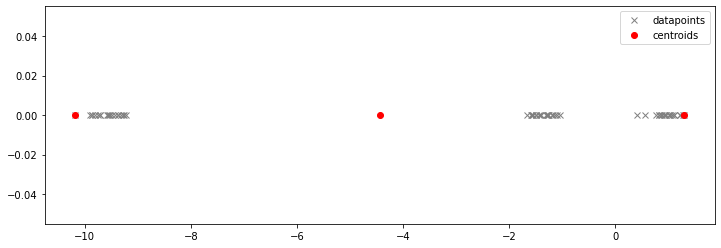

In [5]:
plt.figure(figsize=(12,4))
plt.plot(data, np.zeros_like(data), 'x', c="grey",label="datapoints") # ploting the data
plt.plot(my_centers, np.zeros_like(my_centers), 'o', c="red", label="centroids") # ploting the guessed means
plt.legend()
plt.show();

# K-means-1d


 ------------ 1 EPOCH ------------



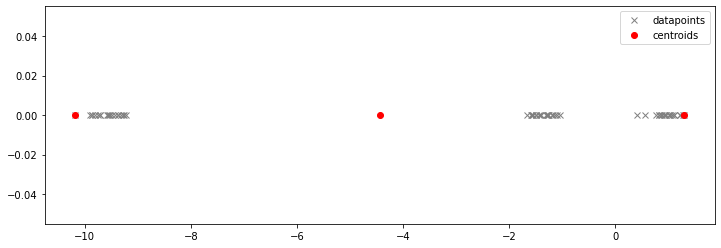

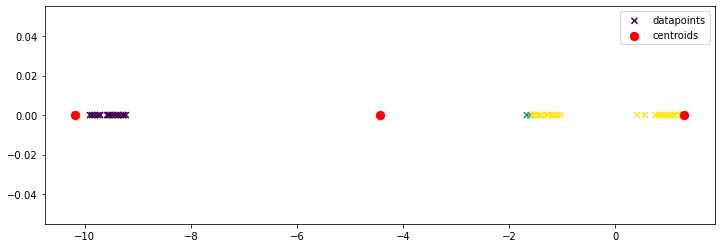


 ------------ 2 EPOCH ------------



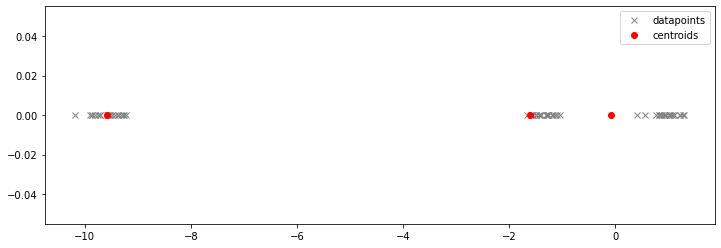

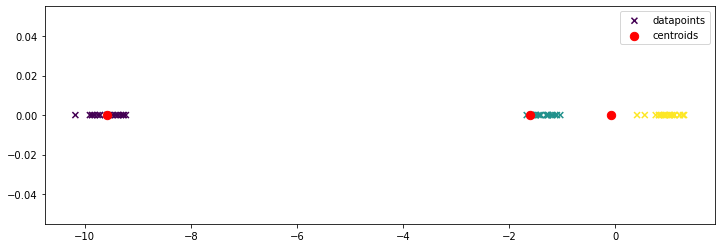


 ------------ 3 EPOCH ------------



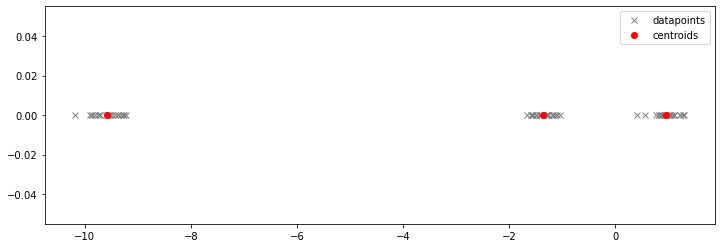

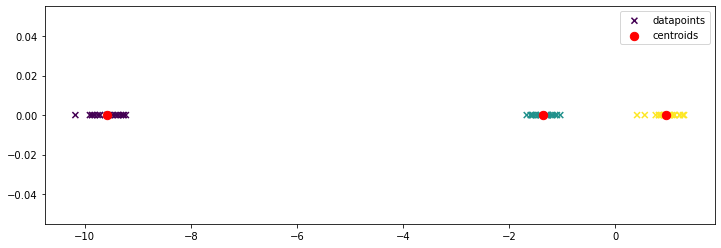


 ------------ 4 EPOCH ------------



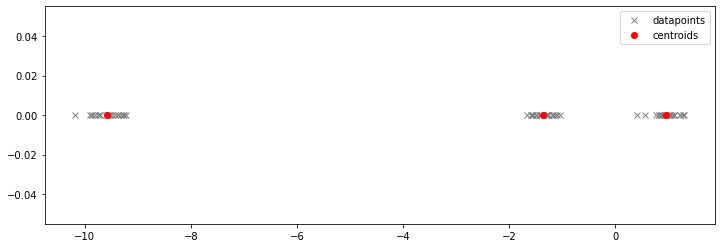

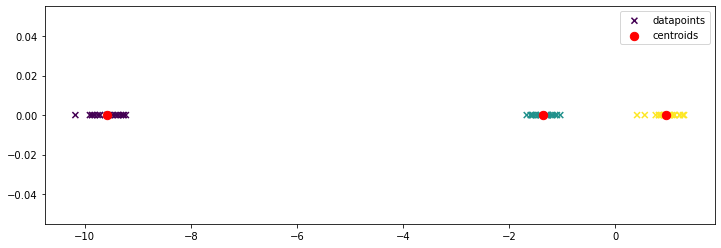


 ------------ 5 EPOCH ------------



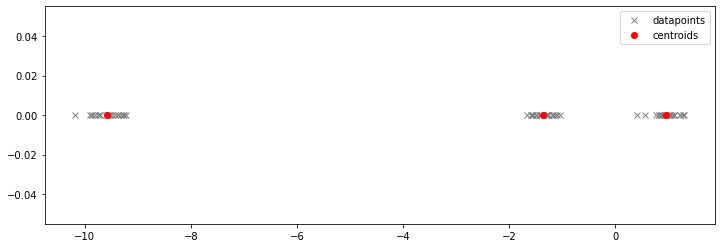

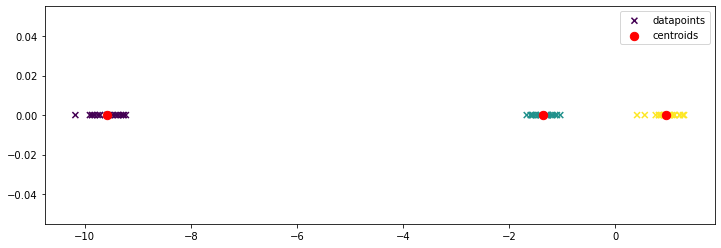


 ------------ 6 EPOCH ------------



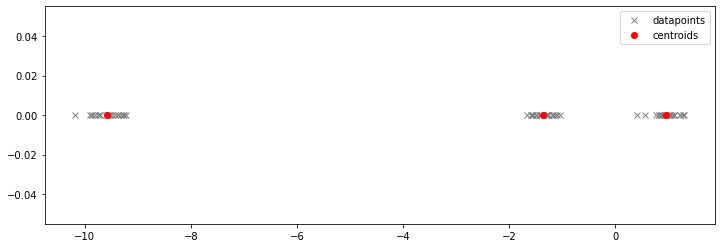

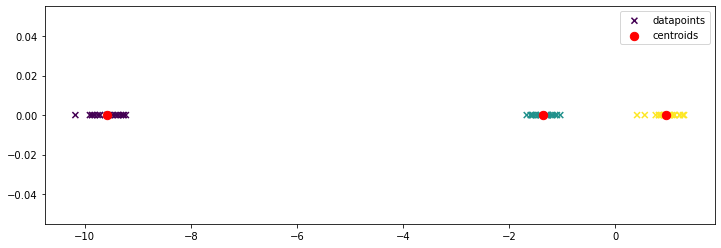

In [6]:
# Algorythm
epochs = 6

for i in range(epochs): # iterating throu epochs
    print(f"\n ------------ {i+1} EPOCH ------------\n")
    
    
    plt.figure(figsize=(12,4))
    plt.plot(data, np.zeros_like(data), 'x', c="grey",label="datapoints") # ploting the data
    plt.plot(my_centers, np.zeros_like(my_centers), 'o', c="red", label="centroids") # ploting the guessed means
    plt.legend()
    plt.show();
    
    
    #--------------------------------------------------------
    # CALCULATING EUCLIDEAN DISTANCE TO EACH CENTROID
    
    ks_dist = {}

    for k in range(len(my_centers)): # iterating throu each my_centers
        dist = []
        
        for x in data: # iterating throu datapoints
            dist = np.append(dist, (x - my_centers[k]) ** 2)
            
        ks_dist[k] = dist
            
    #--------------------------------------------------------
    # CALCULATING WHICH POINTS BELONG TO WHITCH CENTROID
    
    labels = []
    
    for j in range(len(data)): # iterating throu datapoints
        mini = [100_000, 0]

        for k in range(len(my_centers)): # iterating throu each my_centers
            if ks_dist[k][j] <= mini[0]:
                mini = [ks_dist[k][j], k]
            else:
                pass
            
        labels = np.append(labels, mini[1])
    labels
        
    plt.figure(figsize=(12,4))
    plt.scatter(data, np.zeros_like(data), marker="x", c=labels, label="datapoints") # ploting the data
    plt.scatter(my_centers, np.zeros_like(my_centers), s=70, c="red", label="centroids") # ploting the means
    plt.legend()
    plt.show()
    
        
    #--------------------------------------------------------
    # CALCULATING MEANS OF DATAPOINTS GROUPS
    
    counter = Counter(labels) # could have code that
    values = list(counter.values())

    k = 0
    j = 0

    for x in values:
        suma = 0
        
        for i in range(x):
            suma += data[k]
            k += 1
        
        my_centers[j] = suma / values[j]
        j += 1

In [7]:
my_centers

array([-9.59020172, -1.36434765,  0.96351772])

In [8]:
centers.flatten()

array([-1.28010196, -9.48147536,  0.99324956])

Setting up guessed centroids should be more random\
I haven't add moltiple clusters inicialization loop with checking which loop had lowest varaince after algorythm is complete

There is small error in "CALCULATING MEANS OF DATAPOINTS GROUPS",\
that occurs when number of clusters is lower than number of centroids.